# Exercice XLWINGS - Données financières

Utilisez le package ```xlwings``` pour créer un dashboard financier. 

1. Utilisez l'api ```yfinance``` pour récupérer le prix boursier de cloture ('Adj Close') pour Apple, Google et General Motors entre 2020 et 2024.
2. Utilisez ```xlwings``` pour créer un nouveau classeur excel
3. Créez deux worksheet avec les noms: "Stock Price" et "Dashboard"
4. Dans le worksheet "Stock Price", insérez les données de marchées (prix de cloture des trois entreprises)
5. Dans le worksheet "Dashboard", insérez:
    - Un tableau avec la moyenne, le maximum et minimum des prix pour les trois entreprises
    - Une figure représentant les prix des trois entreprises
6. Sauvegardez le fichier excel sous le nom "Stock Analysis.xlsx"

## SOLUTION 

Import des librairies importantes pour l'exercice

In [1]:
import xlwings as xl 
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 

Utilisation de l'API yfinance pour récupérer les données boursières.

In [2]:
tickers = ['AAPL', 'GOOG', 'GM']
df = yf.download(tickers, '2020-01-01', '2024-01-01')['Adj Close']
df.head()

[*********************100%%**********************]  3 of 3 completed


,AAPL,GM,GOOG
Date,,,
2020-01-02,73.059418,36.266399,68.368500
2020-01-03,72.349129,35.237980,68.032997
2020-01-06,72.925629,34.772278,69.710503
2020-01-07,72.582664,34.102833,69.667000
2020-01-08,73.750237,33.617733,70.216003


Création du tableur et des worksheets

In [3]:
wb = xl.Book()

In [4]:
sheet_stock_price = wb.sheets.add("Stock Price")
sheet_stock_price.range('A1').value = df

In [5]:
sheet_dashboard = wb.sheets.add("Dashboard")

Calcul des statistiques (moyenne, maximum et minimum)

In [6]:
stats = {
    'Mean Price': df[['AAPL', 'GOOG', 'GM']].mean().tolist(),
    'Max Price': df[['AAPL', 'GOOG', 'GM']].max().tolist(),
    'Min Price': df[['AAPL', 'GOOG', 'GM']].min().tolist(),
}
stats_df = pd.DataFrame(stats, index=['AAPL', 'GOOG', 'GM'])

sheet_dashboard.range('A1').value = stats_df

Création du graphique de prix 

<Picture 'StocksPlot' in <Sheet [Classeur4]Dashboard>>

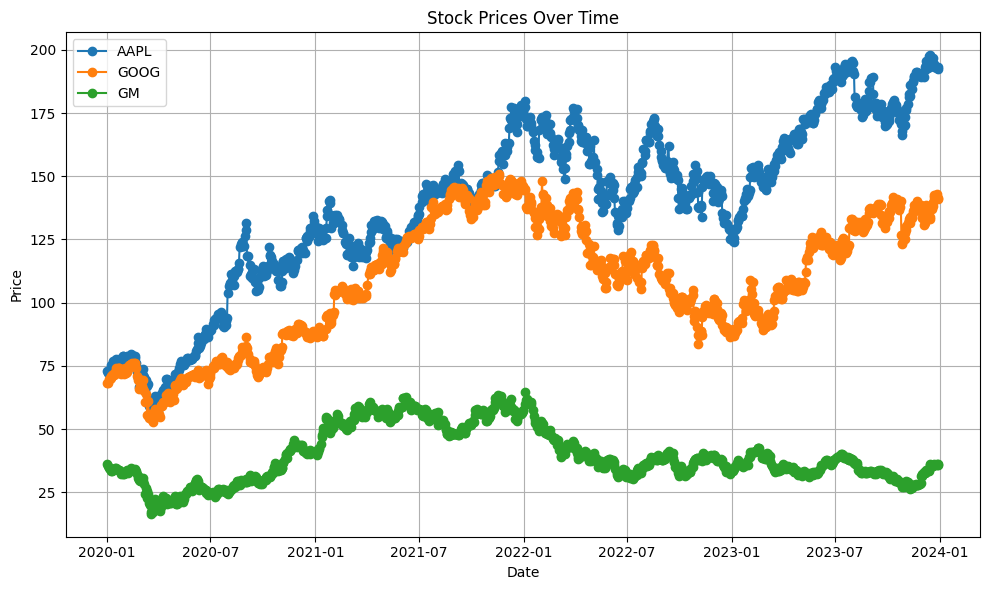

In [7]:
plt.figure(figsize=(10, 6))
for column in ['AAPL', 'GOOG', 'GM']:
    plt.plot(df.index, df[column], marker='o', linestyle='-', label=column)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

plot_path = os.path.abspath('stocks_plot.png')
plt.savefig(plot_path)

sheet_dashboard.pictures.add(plot_path, name='StocksPlot', update=True, left=sheet_dashboard.range('D1').left, top=sheet_dashboard.range('D1').top)

Sauvegarde et cloture du fichier excel

In [8]:
wb.save('Stock_Analysis.xlsx')
wb.close()